In [88]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import omdb

In [2]:
# read the csv file for the Movies Dataset (Kaggle) into a pandas dataframe

meta = pd.read_csv('/Users/stephensinclair/Desktop/the-movies-dataset/movies_metadata.csv')
meta.head().T

/Users/stephensinclair/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


## Features

* **adult**: Indicates if the movie is X-Rated or Adult.
* **belongs_to_collection**: A stringified dictionary that gives information on the movie series the particular film +belongs to.
* **budget**: The budget of the movie in dollars.
* **genres**: A stringified list of dictionaries that list out all the genres associated with the movie.
* **homepage**: The Official Homepage of the move.
* **id** : The ID of the move.
* **imdb_id**: The IMDB ID of the movie.
* **original_language**: The language in which the movie was originally shot in.
* **original_title**: The original title of the movie.
* **overview**: A brief blurb of the movie.
* **popularity**: The Popularity Score assigned by TMDB.
* **poster_path**: The URL of the poster image.
* **production_companies**: A stringified list of production companies involved with the making of the movie.
* **production_countries**: A stringified list of countries where the movie was shot/produced in.
* **release_date**: Theatrical Release Date of the movie.
* **revenue**: The total revenue of the movie in dollars.
* **runtime**: The runtime of the movie in minutes.
* **spoken_languages**: A stringified list of spoken languages in the film.
* **status**: The status of the movie (Released, To Be Released, Announced, etc.)
* **tagline**: The tagline of the movie.
* **title**: The Official Title of the movie.
* **video**: Indicates if there is a video present of the movie with TMDB.
* **vote_average**: The average rating of the movie.
* **vote_count**: The number of votes by users, as counted by TMDB.

In [3]:
meta.shape

(45466, 24)

In [4]:
meta.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [5]:
meta.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [9]:
# movies in the dataset that have revenue > 0

meta_rev = meta[meta['revenue']>0]
meta_rev.shape

(7408, 24)

In [11]:
# Set OMDb defaults for API wrapper

omdb.set_default('apikey', 'bd11b816')
omdb.set_default('timeout', 10)

In [12]:
# get a list of omdb entries for each movie in imdb_rev, searching by imdb_id

omdb_list = [omdb.imdbid(i) for i in meta_rev['imdb_id']]

In [13]:
# put the omdb entries into a dataframe

omdb_df = pd.DataFrame(omdb_list)
omdb_df.head().T

,0,1,2,3,4
actors,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","Whitney Houston, Angela Bassett, Loretta Devin...","Steve Martin, Diane Keaton, Martin Short, Kimb...","Al Pacino, Robert De Niro, Val Kilmer, Jon Voight"
awards,Nominated for 3 Oscars. Another 23 wins & 17 n...,4 wins & 9 nominations.,8 wins & 9 nominations.,Nominated for 1 Golden Globe. Another 1 win & ...,12 nominations.
box_office,N/A,N/A,N/A,N/A,N/A
country,USA,USA,USA,USA,USA
director,John Lasseter,Joe Johnston,Forest Whitaker,Charles Shyer,Michael Mann
dvd,20 Mar 2001,25 Jan 2000,06 Mar 2001,09 May 2000,27 Jul 1999
genre,"Animation, Adventure, Comedy, Family, Fantasy","Adventure, Comedy, Family, Fantasy","Comedy, Drama, Romance","Comedy, Family, Romance","Crime, Drama, Thriller"
imdb_id,tt0114709,tt0113497,tt0114885,tt0113041,tt0113277
imdb_rating,8.3,7.0,5.8,6.0,8.2
imdb_votes,"788,709","267,973","8,640","31,241","520,149"


In [14]:
omdb_df.shape

(7408, 26)

In [16]:
# save omdb df to a csv

omdb_df.to_csv('/Users/stephensinclair/Desktop/omdb_tmdb/omdb_by_tmdb_full.csv')

In [17]:
# create dataframes with only the desired features

meta_view = meta_rev[['imdb_id', 'budget', 'overview', 'revenue', 'runtime', 'tagline']]
meta_view.head()

,imdb_id,budget,overview,revenue,runtime,tagline
0,tt0114709,30000000,"Led by Woody, Andy's toys live happily in his ...",373554033.0,81.0,NaN
1,tt0113497,65000000,When siblings Judy and Peter discover an encha...,262797249.0,104.0,Roll the dice and unleash the excitement!
3,tt0114885,16000000,"Cheated on, mistreated and stepped on, the wom...",81452156.0,127.0,Friends are the people who let you be yourself...
4,tt0113041,0,Just when George Banks has recovered from his ...,76578911.0,106.0,Just When His World Is Back To Normal... He's ...
5,tt0113277,60000000,"Obsessive master thief, Neil McCauley leads a ...",187436818.0,170.0,A Los Angeles Crime Saga


In [19]:
omdb_view = omdb_df[['imdb_id', 'actors', 'country', 'director', 'genre', 'title', 'writer', 'year']]
omdb_view.head()

,imdb_id,actors,country,director,genre,title,writer,year
0,tt0114709,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney",USA,John Lasseter,"Animation, Adventure, Comedy, Family, Fantasy",Toy Story,"John Lasseter (original story by), Pete Docter...",1995
1,tt0113497,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",USA,Joe Johnston,"Adventure, Comedy, Family, Fantasy",Jumanji,"Jonathan Hensleigh (screenplay by), Greg Taylo...",1995
2,tt0114885,"Whitney Houston, Angela Bassett, Loretta Devin...",USA,Forest Whitaker,"Comedy, Drama, Romance",Waiting to Exhale,"Terry McMillan (novel), Terry McMillan (screen...",1995
3,tt0113041,"Steve Martin, Diane Keaton, Martin Short, Kimb...",USA,Charles Shyer,"Comedy, Family, Romance",Father of the Bride Part II,"Albert Hackett (screenplay ""Father's Little Di...",1995
4,tt0113277,"Al Pacino, Robert De Niro, Val Kilmer, Jon Voight",USA,Michael Mann,"Crime, Drama, Thriller",Heat,Michael Mann,1995


In [42]:
movies = pd.merge(meta_view, omdb_view, how='inner', on=['imdb_id', 'imdb_id'])
movies.head()

,imdb_id,budget,overview,revenue,runtime,tagline,actors,country,director,genre,title,writer,year
0,tt0114709,30000000,"Led by Woody, Andy's toys live happily in his ...",373554033.0,81.0,NaN,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney",USA,John Lasseter,"Animation, Adventure, Comedy, Family, Fantasy",Toy Story,"John Lasseter (original story by), Pete Docter...",1995
1,tt0113497,65000000,When siblings Judy and Peter discover an encha...,262797249.0,104.0,Roll the dice and unleash the excitement!,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",USA,Joe Johnston,"Adventure, Comedy, Family, Fantasy",Jumanji,"Jonathan Hensleigh (screenplay by), Greg Taylo...",1995
2,tt0114885,16000000,"Cheated on, mistreated and stepped on, the wom...",81452156.0,127.0,Friends are the people who let you be yourself...,"Whitney Houston, Angela Bassett, Loretta Devin...",USA,Forest Whitaker,"Comedy, Drama, Romance",Waiting to Exhale,"Terry McMillan (novel), Terry McMillan (screen...",1995
3,tt0113041,0,Just when George Banks has recovered from his ...,76578911.0,106.0,Just When His World Is Back To Normal... He's ...,"Steve Martin, Diane Keaton, Martin Short, Kimb...",USA,Charles Shyer,"Comedy, Family, Romance",Father of the Bride Part II,"Albert Hackett (screenplay ""Father's Little Di...",1995
4,tt0113277,60000000,"Obsessive master thief, Neil McCauley leads a ...",187436818.0,170.0,A Los Angeles Crime Saga,"Al Pacino, Robert De Niro, Val Kilmer, Jon Voight",USA,Michael Mann,"Crime, Drama, Thriller",Heat,Michael Mann,1995


In [43]:
movies.shape

(7426, 13)

In [44]:
movies.isnull().sum()

imdb_id        0
budget         0
overview      22
revenue        0
runtime        6
tagline     1470
actors         0
country        0
director       0
genre          0
title          0
writer         0
year           0
dtype: int64

In [45]:
# check for duplicates

movies[movies.duplicated()==True]

,imdb_id,budget,overview,revenue,runtime,tagline,actors,country,director,genre,title,writer,year
416,tt0022879,4,British nurse Catherine Barkley (Helen Hayes) ...,25.0,89.0,Every woman who has loved will understand,"Helen Hayes, Gary Cooper, Adolphe Menjou, Mary...",USA,Frank Borzage,"Drama, Romance, War",A Farewell to Arms,"Benjamin Glazer (screenplay), Oliver H.P. Garr...",1932
417,tt0022879,4,British nurse Catherine Barkley (Helen Hayes) ...,25.0,89.0,Every woman who has loved will understand,"Helen Hayes, Gary Cooper, Adolphe Menjou, Mary...",USA,Frank Borzage,"Drama, Romance, War",A Farewell to Arms,"Benjamin Glazer (screenplay), Oliver H.P. Garr...",1932
418,tt0022879,4,British nurse Catherine Barkley (Helen Hayes) ...,25.0,89.0,Every woman who has loved will understand,"Helen Hayes, Gary Cooper, Adolphe Menjou, Mary...",USA,Frank Borzage,"Drama, Romance, War",A Farewell to Arms,"Benjamin Glazer (screenplay), Oliver H.P. Garr...",1932
1908,tt0235679,16000000,When Molly Hale's sadness of her father's disa...,68411275.0,93.0,Pokémon: Spell of the Unknown,"Rica Matsumoto, Veronica Taylor, Rachael Lilli...",Japan,"Kunihiko Yuyama, Michael Haigney","Animation, Action, Adventure, Family, Fantasy,...",Pokémon 3: The Movie,"Norman J. Grossfeld (english version), Michael...",2000
1909,tt0235679,16000000,When Molly Hale's sadness of her father's disa...,68411275.0,93.0,Pokémon: Spell of the Unknown,"Rica Matsumoto, Veronica Taylor, Rachael Lilli...",Japan,"Kunihiko Yuyama, Michael Haigney","Animation, Action, Adventure, Family, Fantasy,...",Pokémon 3: The Movie,"Norman J. Grossfeld (english version), Michael...",2000
1910,tt0235679,16000000,When Molly Hale's sadness of her father's disa...,68411275.0,93.0,Pokémon: Spell of the Unknown,"Rica Matsumoto, Veronica Taylor, Rachael Lilli...",Japan,"Kunihiko Yuyama, Michael Haigney","Animation, Action, Adventure, Family, Fantasy,...",Pokémon 3: The Movie,"Norman J. Grossfeld (english version), Michael...",2000
2006,tt2018086,3512454,"Winter, 1915. Confined by her family to an asy...",115860.0,95.0,NaN,"Juliette Binoche, Jean-Luc Vincent, Jessica Er...",France,Bruno Dumont,"Biography, Drama",Camille Claudel 1915,"Paul Claudel (letters), Camille Claudel (lette...",2013
2007,tt2018086,3512454,"Winter, 1915. Confined by her family to an asy...",115860.0,95.0,NaN,"Juliette Binoche, Jean-Luc Vincent, Jessica Er...",France,Bruno Dumont,"Biography, Drama",Camille Claudel 1915,"Paul Claudel (letters), Camille Claudel (lette...",2013
2008,tt2018086,3512454,"Winter, 1915. Confined by her family to an asy...",115860.0,95.0,NaN,"Juliette Binoche, Jean-Luc Vincent, Jessica Er...",France,Bruno Dumont,"Biography, Drama",Camille Claudel 1915,"Paul Claudel (letters), Camille Claudel (lette...",2013
2312,tt0157472,26000000,"Until now, Zak Gibbs' greatest challenge has b...",38793283.0,94.0,"The adventure of a lifetime, in a few mere sec...","Jesse Bradford, French Stewart, Paula Garcés, ...",USA,Jonathan Frakes,"Action, Adventure, Comedy, Sci-Fi, Thriller",Clockstoppers,"Rob Hedden (story), Andy Hedden (story), J. Da...",2002


In [46]:
# drop the duplicates

movies = movies.drop([417, 418, 
                      1909, 1910, 
                      2007, 2008, 
                      2313, 2314, 
                      2459, 2460, 
                      2566, 2567, 
                      3042, 3043, 
                      3797, 3798, 
                      5503, 5504, 
                      6089, 6090], 
                     axis=0).copy()

In [47]:
# 7406 unique movies with revenue data 

movies.shape

(7406, 13)

In [48]:
# check the data types of the features

movies.dtypes

imdb_id      object
budget       object
overview     object
revenue     float64
runtime     float64
tagline      object
actors       object
country      object
director     object
genre        object
title        object
writer       object
year         object
dtype: object

In [49]:
# find null values in runtime

movies[movies['runtime'].isnull()==True]

,imdb_id,budget,overview,revenue,runtime,tagline,actors,country,director,genre,title,writer,year
305,tt0116485,0,NaN,65335.0,NaN,NaN,"Erik Goertz, Anton Rattinger, Dieter Wardetzky...",Germany,Ed Herzog,Comedy,Happy Weekend,"Ed Herzog, Rainer Knepperges",1996
6241,tt3132094,0,NaN,2483130.0,NaN,NaN,"Eloy Azorín, Manuel Baqueiro, María Castro, Pa...",Spain,Tom Fernández,"Comedy, Family",Millionaire Dog,Tom Fernández,2014
6787,tt0078010,0,NaN,495861.0,NaN,NaN,"Inma de Santis, Nadia Windel, Carlos Ballester...",Spain,José Antonio de la Loma,Comedy,Nunca en horas de clase,José Antonio de la Loma,1978
7043,tt0082131,0,NaN,591696.0,NaN,NaN,"Eva Lyberten, Andrea Albani, Vicky Palma, Anto...",Spain,Ignacio F. Iquino,Comedy,The Hot Girl Juliet,"Ignacio F. Iquino (screenplay), Ignacio F. Iqu...",1981
7106,tt2192844,0,NaN,3.0,NaN,NaN,"Salome Ala-Könni, Carl Alm, Jussi Anttonen, Ma...",Finland,Jarmo Lampela,Drama,Miesten välisiä keskusteluja,Jarmo Lampela,2012
7318,tt1107828,6000000,NaN,31000.0,NaN,NaN,"Sergey Astakhov, Natalya Fateeva, Roman Indyk,...",Russia,Yuriy Kara,"Biography, Drama",Korolyov,Yuriy Kara (screenplay),2007


In [50]:
# fill in the null values with data from IMDb (manually searched)

movies.at[305, 'runtime'] = 101
movies.at[6241, 'runtime'] = 91
movies.at[6787, 'runtime'] = 100
movies.at[7043, 'runtime'] = 93
movies.at[7106, 'runtime'] = 90
movies.at[7318, 'runtime'] = 130

In [51]:
movies[movies['runtime'].isnull()==True]

,imdb_id,budget,overview,revenue,runtime,tagline,actors,country,director,genre,title,writer,year


In [52]:
# change the numeric features to integers

movies['year'] = movies['year'].astype(int)
movies['budget'] = movies['budget'].astype(int)
movies['revenue'] = movies['revenue'].astype(int)
movies['runtime'] = movies['runtime'].astype(int)

In [53]:
movies.dtypes

imdb_id     object
budget       int64
overview    object
revenue      int64
runtime      int64
tagline     object
actors      object
country     object
director    object
genre       object
title       object
writer      object
year         int64
dtype: object

In [54]:
movies.describe()

,budget,revenue,runtime,year
count,7.406000e+03,7.406000e+03,7406.000000,7406.000000
mean,2.259254e+07,6.880558e+07,107.706184,1999.603970
std,3.693299e+07,1.464359e+08,21.472859,15.463182
min,0.000000e+00,1.000000e+00,0.000000,1915.000000
25%,0.000000e+00,2.400000e+06,94.000000,1992.000000
50%,7.500000e+06,1.683423e+07,104.000000,2004.000000
75%,2.800000e+07,6.728121e+07,118.000000,2011.000000
max,3.800000e+08,2.787965e+09,338.000000,2017.000000


In [55]:
# save the dataframe to a csv

movies.to_csv('/Users/stephensinclair/Desktop/omdb_tmdb/movies_update.csv')

In [74]:
# engineer an adjusted revenue feature
# load csv with yearly ticket prices in 2019 dollars
# price data comes from the MPAA

prices = pd.read_csv('/Users/stephensinclair/Desktop/omdb_tmdb/ticket_price_by year.csv')
prices.head()

,year,price
0,2019,9.01
1,2018,9.11
2,2017,8.97
3,2016,8.65
4,2015,8.43


In [76]:
price_dict = pd.Series(prices['price'].values,index=prices['year']).to_dict()
price_dict

{2019: 9.01,
 2018: 9.11,
 2017: 8.97,
 2016: 8.65,
 2015: 8.43,
 2014: 8.17,
 2013: 8.13,
 2012: 7.96,
 2011: 7.93,
 2010: 7.89,
 2009: 7.5,
 2008: 7.18,
 2007: 6.88,
 2006: 6.55,
 2005: 6.41,
 2004: 6.21,
 2003: 6.03,
 2002: 5.81,
 2001: 5.66,
 2000: 5.39,
 1999: 5.08,
 1998: 4.69,
 1997: 4.59,
 1996: 4.42,
 1995: 4.35,
 1994: 4.18,
 1993: 4.14,
 1992: 4.15,
 1991: 4.21,
 1990: 4.23,
 1989: 3.97,
 1988: 4.11,
 1987: 3.91,
 1986: 3.71,
 1985: 3.55,
 1984: 3.36,
 1983: 3.15,
 1982: 2.94,
 1981: 2.78,
 1980: 2.69,
 1979: 2.51,
 1978: 2.34,
 1977: 2.23,
 1976: 2.13,
 1975: 2.05,
 1974: 1.87,
 1973: 1.77,
 1972: 1.7,
 1971: 1.65,
 1970: 1.55,
 1969: 1.42,
 1968: 1.31,
 1967: 1.2,
 1966: 1.09,
 1965: 1.01,
 1964: 0.93,
 1963: 0.85,
 1962: 0.7,
 1961: 0.69,
 1960: 0.51,
 1959: 0.51,
 1958: 0.5,
 1957: 0.5,
 1956: 0.5,
 1955: 0.45,
 1954: 0.45,
 1953: 0.6,
 1952: 0.53,
 1951: 0.53,
 1950: 0.46,
 1949: 0.46,
 1948: 0.4,
 1947: 0.35,
 1946: 0.35,
 1945: 0.35,
 1944: 0.32,
 1943: 0.29,
 1942: 0

In [77]:
movies['price'] = movies['year'].map(price_dict)
movies.head()

,imdb_id,budget,overview,revenue,runtime,tagline,actors,country,director,genre,title,writer,year,price
0,tt0114709,30000000,"Led by Woody, Andy's toys live happily in his ...",373554033,81,NaN,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney",USA,John Lasseter,"Animation, Adventure, Comedy, Family, Fantasy",Toy Story,"John Lasseter (original story by), Pete Docter...",1995,4.35
1,tt0113497,65000000,When siblings Judy and Peter discover an encha...,262797249,104,Roll the dice and unleash the excitement!,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",USA,Joe Johnston,"Adventure, Comedy, Family, Fantasy",Jumanji,"Jonathan Hensleigh (screenplay by), Greg Taylo...",1995,4.35
2,tt0114885,16000000,"Cheated on, mistreated and stepped on, the wom...",81452156,127,Friends are the people who let you be yourself...,"Whitney Houston, Angela Bassett, Loretta Devin...",USA,Forest Whitaker,"Comedy, Drama, Romance",Waiting to Exhale,"Terry McMillan (novel), Terry McMillan (screen...",1995,4.35
3,tt0113041,0,Just when George Banks has recovered from his ...,76578911,106,Just When His World Is Back To Normal... He's ...,"Steve Martin, Diane Keaton, Martin Short, Kimb...",USA,Charles Shyer,"Comedy, Family, Romance",Father of the Bride Part II,"Albert Hackett (screenplay ""Father's Little Di...",1995,4.35
4,tt0113277,60000000,"Obsessive master thief, Neil McCauley leads a ...",187436818,170,A Los Angeles Crime Saga,"Al Pacino, Robert De Niro, Val Kilmer, Jon Voight",USA,Michael Mann,"Crime, Drama, Thriller",Heat,Michael Mann,1995,4.35


In [78]:
# create an adjusted revenue feature

current_price = 9.01
movies['revenue_adj'] = movies['revenue'] * (current_price/movies['price'])
movies.head()

,imdb_id,budget,overview,revenue,runtime,tagline,actors,country,director,genre,title,writer,year,price,revenue_adj
0,tt0114709,30000000,"Led by Woody, Andy's toys live happily in his ...",373554033,81,NaN,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney",USA,John Lasseter,"Animation, Adventure, Comedy, Family, Fantasy",Toy Story,"John Lasseter (original story by), Pete Docter...",1995,4.35,7.737292e+08
1,tt0113497,65000000,When siblings Judy and Peter discover an encha...,262797249,104,Roll the dice and unleash the excitement!,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",USA,Joe Johnston,"Adventure, Comedy, Family, Fantasy",Jumanji,"Jonathan Hensleigh (screenplay by), Greg Taylo...",1995,4.35,5.443226e+08
2,tt0114885,16000000,"Cheated on, mistreated and stepped on, the wom...",81452156,127,Friends are the people who let you be yourself...,"Whitney Houston, Angela Bassett, Loretta Devin...",USA,Forest Whitaker,"Comedy, Drama, Romance",Waiting to Exhale,"Terry McMillan (novel), Terry McMillan (screen...",1995,4.35,1.687089e+08
3,tt0113041,0,Just when George Banks has recovered from his ...,76578911,106,Just When His World Is Back To Normal... He's ...,"Steve Martin, Diane Keaton, Martin Short, Kimb...",USA,Charles Shyer,"Comedy, Family, Romance",Father of the Bride Part II,"Albert Hackett (screenplay ""Father's Little Di...",1995,4.35,1.586152e+08
4,tt0113277,60000000,"Obsessive master thief, Neil McCauley leads a ...",187436818,170,A Los Angeles Crime Saga,"Al Pacino, Robert De Niro, Val Kilmer, Jon Voight",USA,Michael Mann,"Crime, Drama, Thriller",Heat,Michael Mann,1995,4.35,3.882312e+08


In [81]:
movies['revenue_adj'] = movies['revenue_adj'].astype(int)

In [82]:
movies.dtypes

imdb_id         object
budget           int64
overview        object
revenue          int64
runtime          int64
tagline         object
actors          object
country         object
director        object
genre           object
title           object
writer          object
year             int64
price          float64
revenue_adj      int64
dtype: object

In [83]:
movies.head()

,imdb_id,budget,overview,revenue,runtime,tagline,actors,country,director,genre,title,writer,year,price,revenue_adj
0,tt0114709,30000000,"Led by Woody, Andy's toys live happily in his ...",373554033,81,NaN,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney",USA,John Lasseter,"Animation, Adventure, Comedy, Family, Fantasy",Toy Story,"John Lasseter (original story by), Pete Docter...",1995,4.35,773729158
1,tt0113497,65000000,When siblings Judy and Peter discover an encha...,262797249,104,Roll the dice and unleash the excitement!,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",USA,Joe Johnston,"Adventure, Comedy, Family, Fantasy",Jumanji,"Jonathan Hensleigh (screenplay by), Greg Taylo...",1995,4.35,544322577
2,tt0114885,16000000,"Cheated on, mistreated and stepped on, the wom...",81452156,127,Friends are the people who let you be yourself...,"Whitney Houston, Angela Bassett, Loretta Devin...",USA,Forest Whitaker,"Comedy, Drama, Romance",Waiting to Exhale,"Terry McMillan (novel), Terry McMillan (screen...",1995,4.35,168708948
3,tt0113041,0,Just when George Banks has recovered from his ...,76578911,106,Just When His World Is Back To Normal... He's ...,"Steve Martin, Diane Keaton, Martin Short, Kimb...",USA,Charles Shyer,"Comedy, Family, Romance",Father of the Bride Part II,"Albert Hackett (screenplay ""Father's Little Di...",1995,4.35,158615169
4,tt0113277,60000000,"Obsessive master thief, Neil McCauley leads a ...",187436818,170,A Los Angeles Crime Saga,"Al Pacino, Robert De Niro, Val Kilmer, Jon Voight",USA,Michael Mann,"Crime, Drama, Thriller",Heat,Michael Mann,1995,4.35,388231202


In [84]:
movies.to_csv('/Users/stephensinclair/Desktop/omdb_tmdb/movies_final.csv')

In [85]:
movies['genre'].value_counts()[0:20]

Drama                              362
Comedy, Drama, Romance             331
Comedy                             315
Drama, Romance                     275
Comedy, Drama                      264
Comedy, Romance                    223
Crime, Drama, Thriller             140
Action, Crime, Drama, Thriller     100
Action, Crime, Thriller             98
Drama, Thriller                     93
Horror, Thriller                    91
Crime, Drama                        90
Crime, Drama, Mystery, Thriller     89
Documentary                         73
Comedy, Crime                       72
Horror, Mystery, Thriller           71
Action, Adventure, Sci-Fi           69
Biography, Drama                    67
Horror                              60
Action, Adventure, Thriller         51
Name: genre, dtype: int64

In [86]:
cdr = movies[movies['genre']=='Comedy, Drama, Romance']

In [116]:
# create a table with the year and the total revenue from all movies in the genre that year

cdr_table = pd.DataFrame(pd.pivot_table(cdr, values='revenue_adj', index='year', aggfunc=np.sum)).reset_index()
cdr_table.head()

,year,revenue_adj
0,1931,493773
1,1938,267888960
2,1954,200222222
3,1960,688999998
4,1961,125365178


In [ ]:
# plot budget on the same 

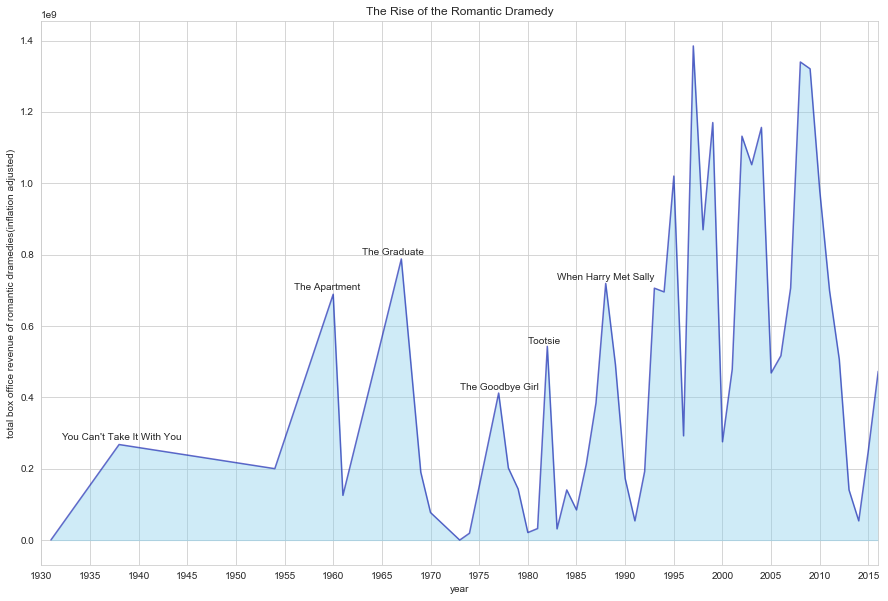

In [127]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set_style("whitegrid")

plt.fill_between(cdr_table['year'], cdr_table['revenue_adj'], color="skyblue", alpha=0.4)
plt.plot(cdr_table['year'], cdr_table['revenue_adj'], c='xkcd:cobalt blue', alpha=0.6)

plt.xticks(np.arange(1930, 2018, 5))
plt.xlim(1930,2016)
plt.title('The Rise of the Romantic Dramedy')
plt.xlabel('year')
plt.ylabel('total box office revenue of romantic dramedies(inflation adjusted)')

ax.text(1932, 280000000, "You Can't Take It With You")
ax.text(1956, 700000000, 'The Apartment')
ax.text(1963, 800000000, 'The Graduate')
ax.text(1973, 420000000, 'The Goodbye Girl')
ax.text(1980, 550000000, 'Tootsie')
ax.text(1983, 730000000, 'When Harry Met Sally')

plt.show()

In [106]:
movies[(movies['genre']=='Comedy, Drama, Romance') & (movies['year']==1977)]

,imdb_id,budget,overview,revenue,runtime,tagline,actors,country,director,genre,title,writer,year,price,revenue_adj
1485,tt0076095,0,"Paula McFadden knows: In romance, actors all f...",102000000,111,Thank you Neil Simon for making us laugh at fa...,"Richard Dreyfuss, Marsha Mason, Quinn Cummings...",USA,Herbert Ross,"Comedy, Drama, Romance",The Goodbye Girl,Neil Simon,1977,2.23,412116591


In [128]:
# median budget by year

In [ ]:
# action adventure sci-fi